In [1]:
import keras
from sklearn.model_selection import train_test_split

# IMDB 데이터 셋
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=500)

In [2]:
# 훈련, 검증 세트

from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [5]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [9]:
# LSTM 순환 신경망 층 구성
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100, )))
model.add(keras.layers.Embedding(500, 16))
model.add(keras.layers.LSTM(8, activation='tanh', dropout=0.2, return_sequences=True)) # return_sequences : 모든 은닉 상태 출력 전달
model.add(keras.layers.LSTM(8, dropout=0.2)) # 마지막 은닉 상태만 출력
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 옵티마이저, 손실함수, 측정지표
model. compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6118 - loss: 0.6351 - val_accuracy: 0.7852 - val_loss: 0.4583
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7807 - loss: 0.4700 - val_accuracy: 0.8016 - val_loss: 0.4336
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7858 - loss: 0.4585 - val_accuracy: 0.8020 - val_loss: 0.4219
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8025 - loss: 0.4358 - val_accuracy: 0.8054 - val_loss: 0.4167
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8096 - loss: 0.4178 - val_accuracy: 0.8046 - val_loss: 0.4158
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8068 - loss: 0.4103 - val_accuracy: 0.8122 - val_loss: 0.4124
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8103 - loss: 0.4085 - val_accuracy: 0.7904 - val_loss: 0.4752
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8158 - loss: 0

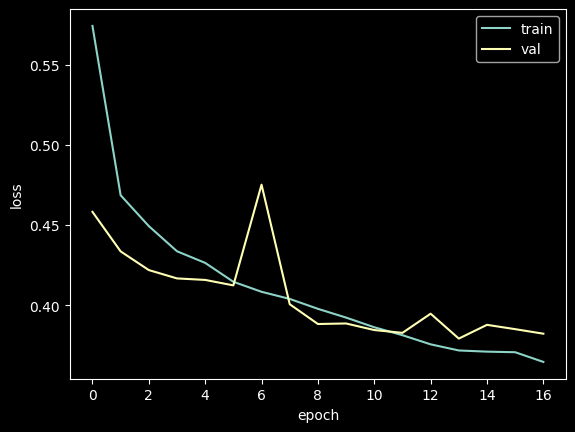

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()